### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

#### Read Data


In [2]:
airbnb= pd.read_csv('/home/aman/Documents/EDA-s/New-York-City-Airbnb-Open-Data/data/AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Shape of the dataset


In [3]:
print(f"The shape of the dataset is {airbnb.shape}")

The shape of the dataset is (48895, 16)


#### Check the datatypes of the dataset


In [4]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Cleaning, Wrangling and Understanding the Data


In [5]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Drop unnecessary columns

- id
- host_name
- last_review


In [6]:
airbnb.drop(['id','host_name','last_review','name','host_id'],axis=1,inplace=True)

In [7]:
airbnb

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


#### we can observe there are lot of null values in column 'reviews_per_month' ==10052

- we replace all the null values in column 'reviews_per_month' with 0



In [8]:
airbnb['reviews_per_month'].fillna(0,inplace=True)

#### Look into Categorical values

- neighbourhood_group
- neighbourhood
- room_type


# neighbourhood_group

In [9]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

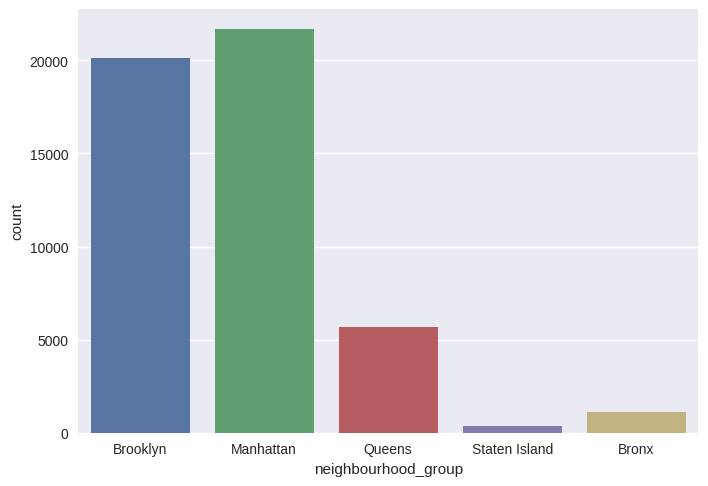

In [10]:
sns.countplot(x='neighbourhood_group',data=airbnb)
plt.show()

In [11]:
print(f"Number of unique neighbourhood places are {len(airbnb['neighbourhood'].unique())}")

Number of unique neighbourhood places are 221


# ROOM TYPE

In [12]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

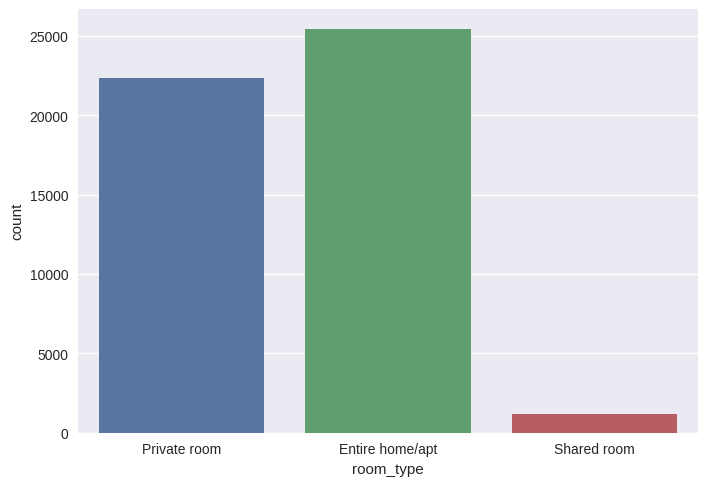

In [13]:
sns.countplot(x='room_type',data=airbnb)
plt.show()

# NEIGHBOURHOOD

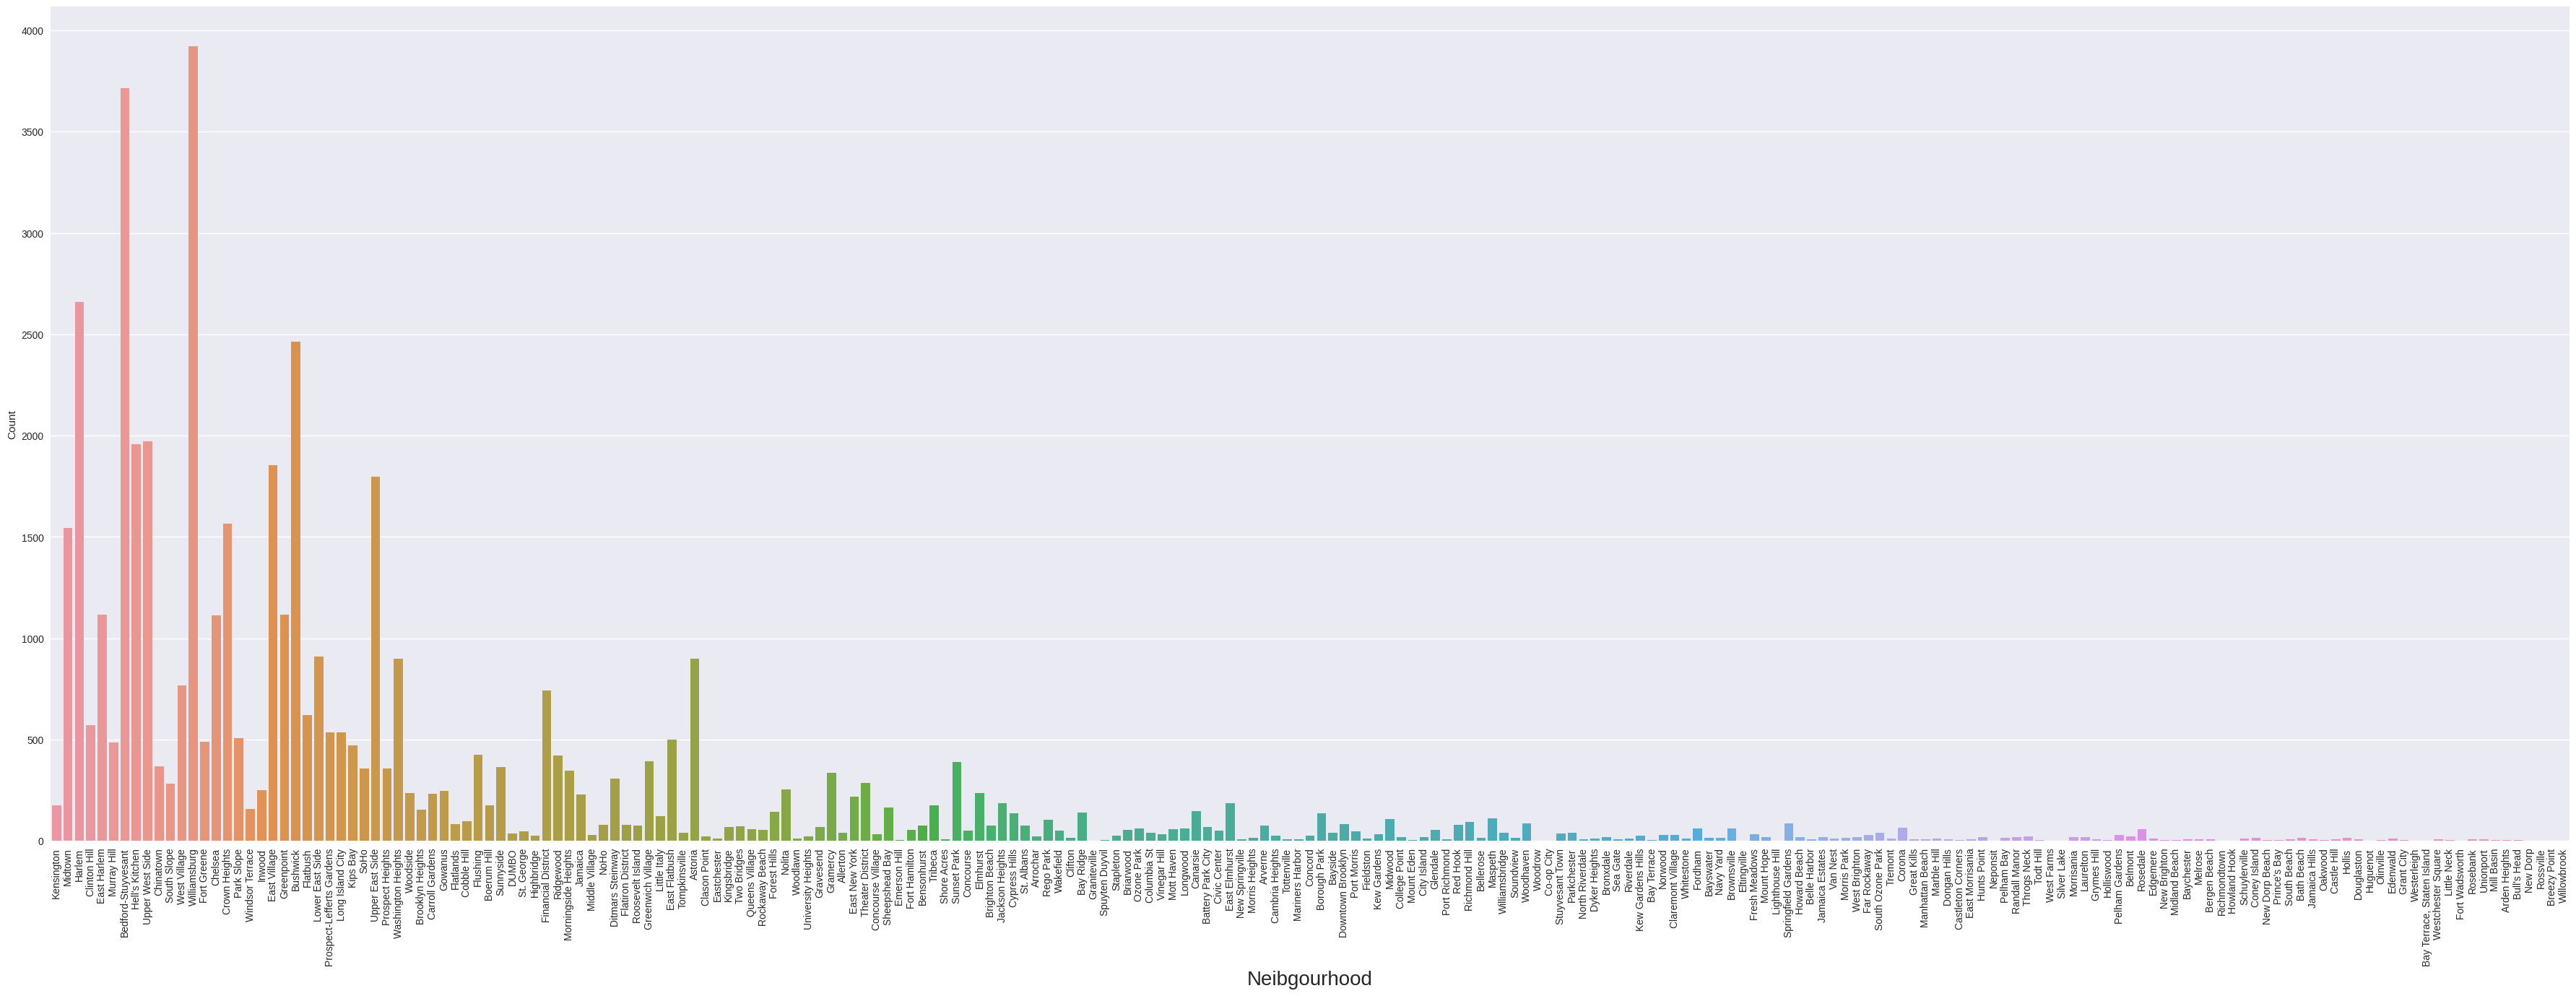

In [14]:
plt.figure(figsize=(45,15))
sns.countplot(airbnb.neighbourhood, data=airbnb)
plt.xlabel('Neibgourhood', fontsize=20)
plt.ylabel("Count")
plt.xticks(rotation= 90)
plt.show()

In [15]:
airbnb=airbnb.drop(['latitude','longitude','neighbourhood'],axis=1)

In [16]:
airbnb

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Private room,150,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,70,2,0,0.00,2,9
48891,Brooklyn,Private room,40,4,0,0.00,2,36
48892,Manhattan,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,Shared room,55,1,0,0.00,6,2


#### Take care of categorical values

In [17]:
list=['neighbourhood_group','room_type']
airbnb=pd.get_dummies(airbnb,columns=list)

In [18]:
airbnb.rename(columns = {'room_type_Entire home/apt':'home', 'room_type_Private room':'Private','room_type_Shared room':'shared'}, inplace = True)

In [19]:
airbnb.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'home', 'Private', 'shared'],
      dtype='object')

In [20]:
airbnb= airbnb.drop(['neighbourhood_group_Staten Island','shared'],axis=1)
airbnb


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,home,Private
0,149,1,9,0.21,6,365,0,1,0,0,0,1
1,225,1,45,0.38,2,355,0,0,1,0,1,0
2,150,3,0,0.00,1,365,0,0,1,0,0,1
3,89,1,270,4.64,1,194,0,1,0,0,1,0
4,80,10,9,0.10,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,2,0,0.00,2,9,0,1,0,0,0,1
48891,40,4,0,0.00,2,36,0,1,0,0,0,1
48892,115,10,0,0.00,1,27,0,0,1,0,1,0
48893,55,1,0,0.00,6,2,0,0,1,0,0,0


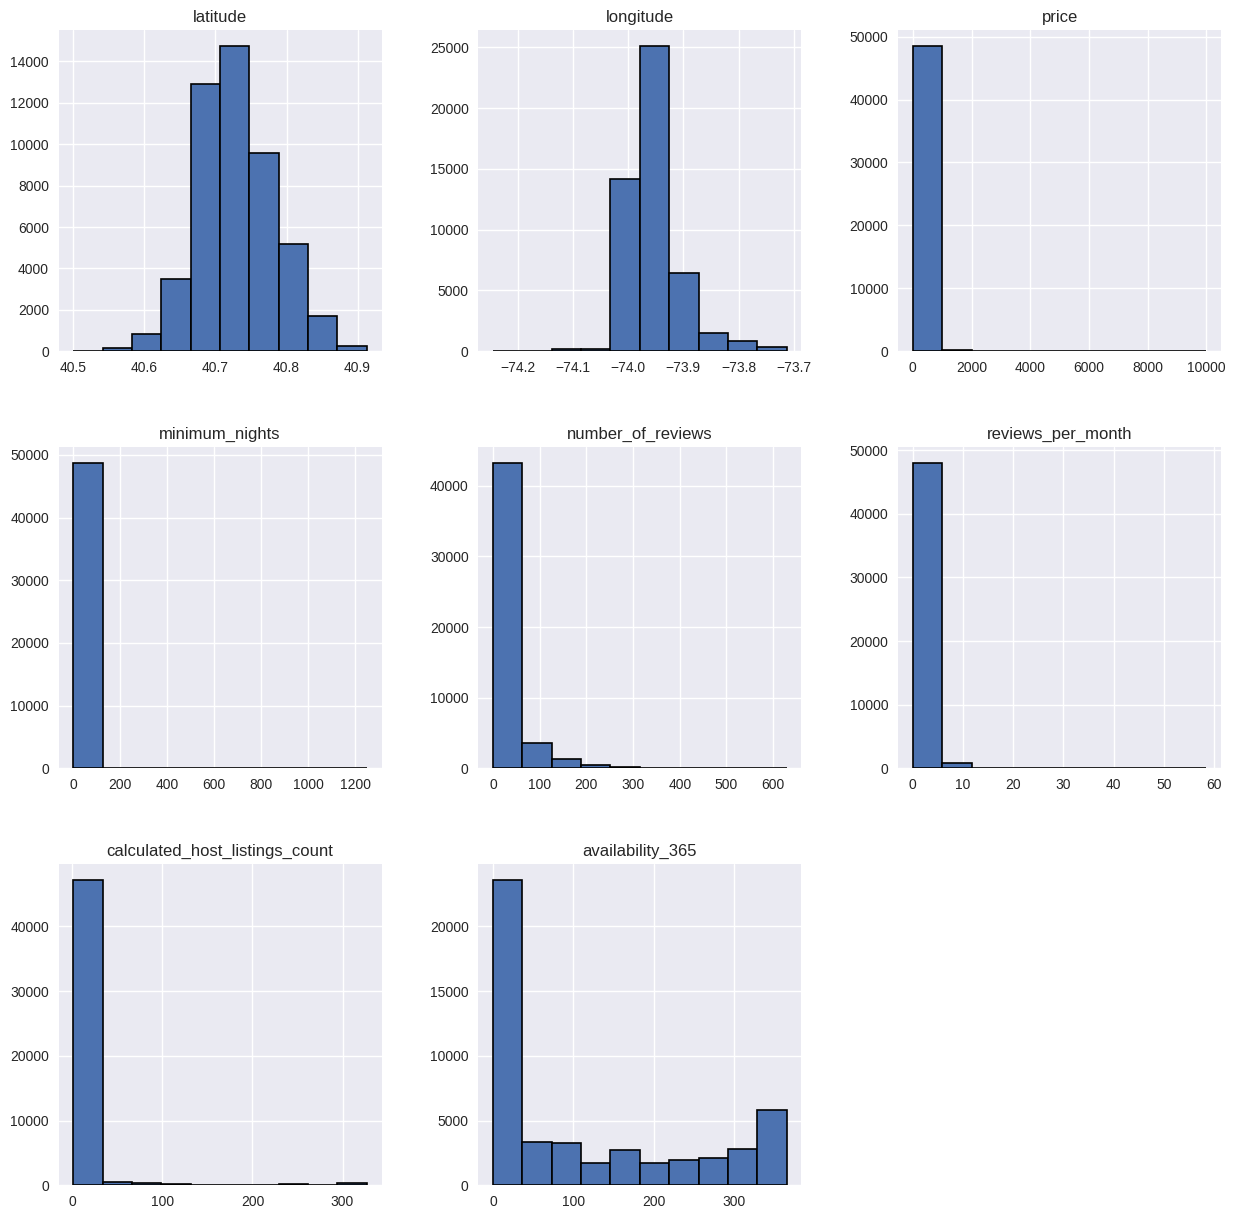

In [ ]:
airbnb.hist(edgecolor="black", linewidth=1.2, figsize=(15,15))
plt.show()

<Figure size 1500x1500 with 0 Axes>

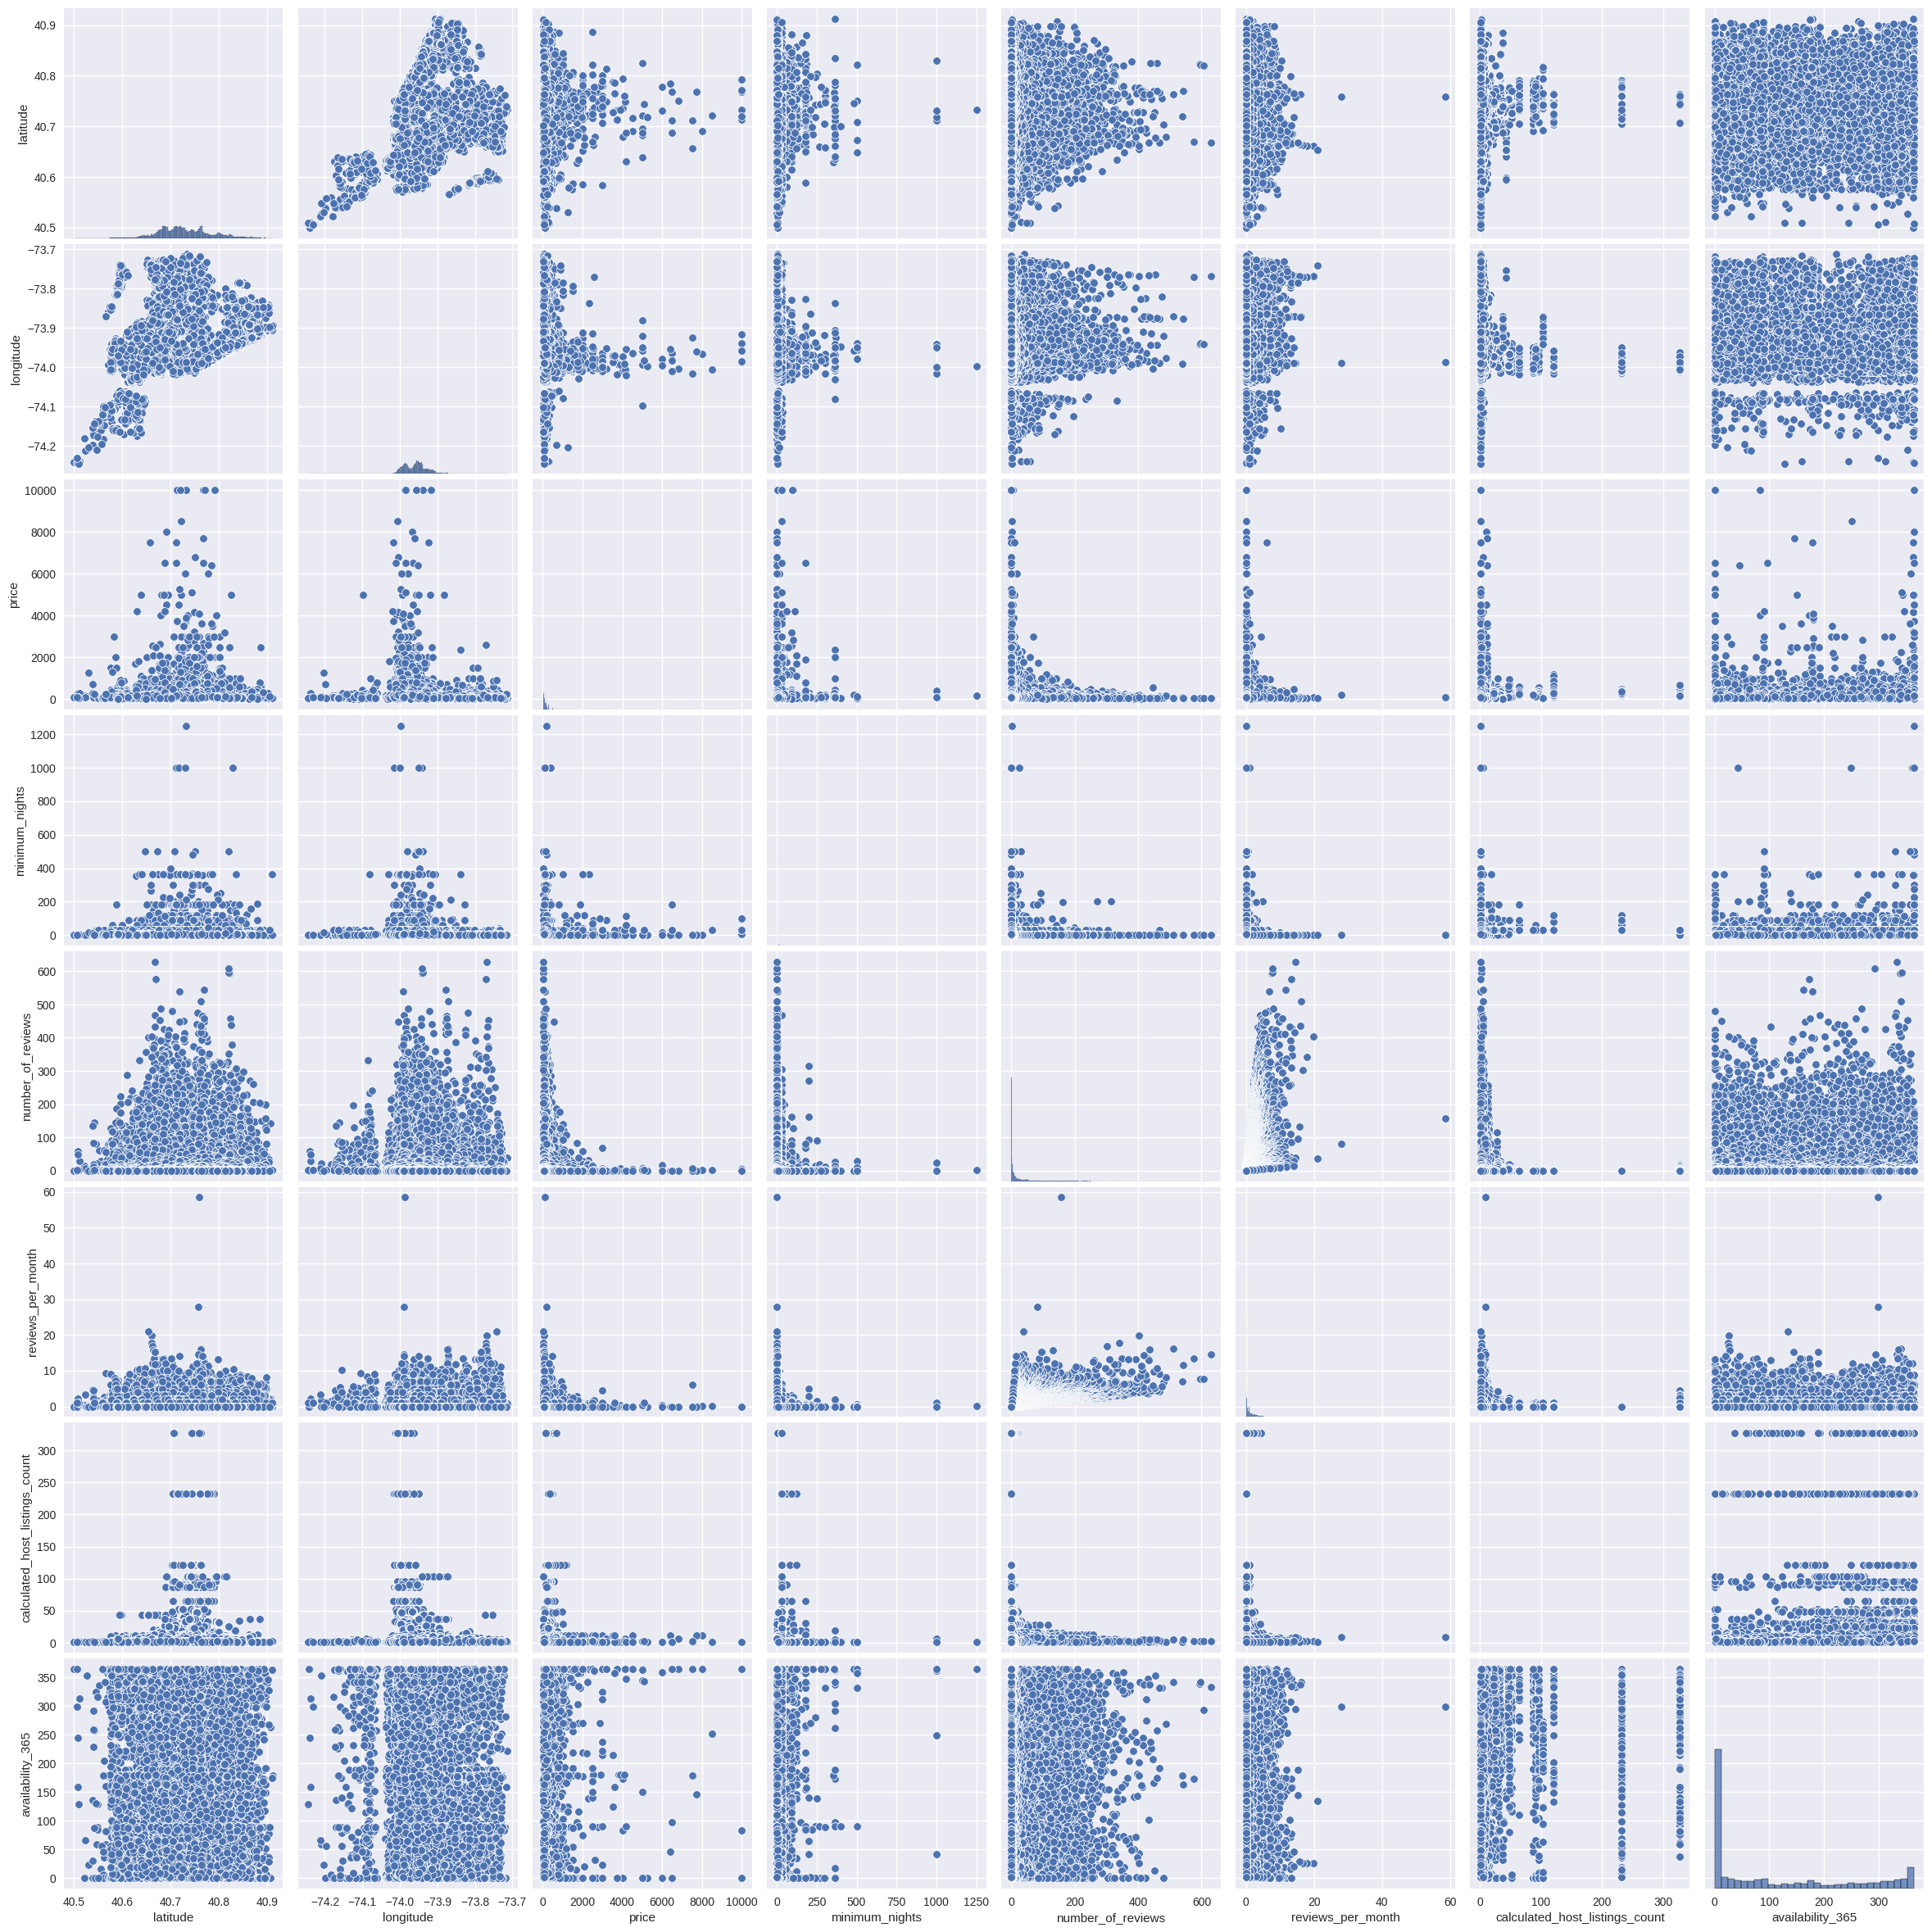

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(airbnb, height=3, diag_kind="hist")

* We can drop latitude and longitude from the dataset
* reviews_per_month has a lot of outlayers, 

In [ ]:
col= list(airbnb.columns)
col.remove("latitude")
col.remove("longitude")

In [ ]:
print(col)

['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


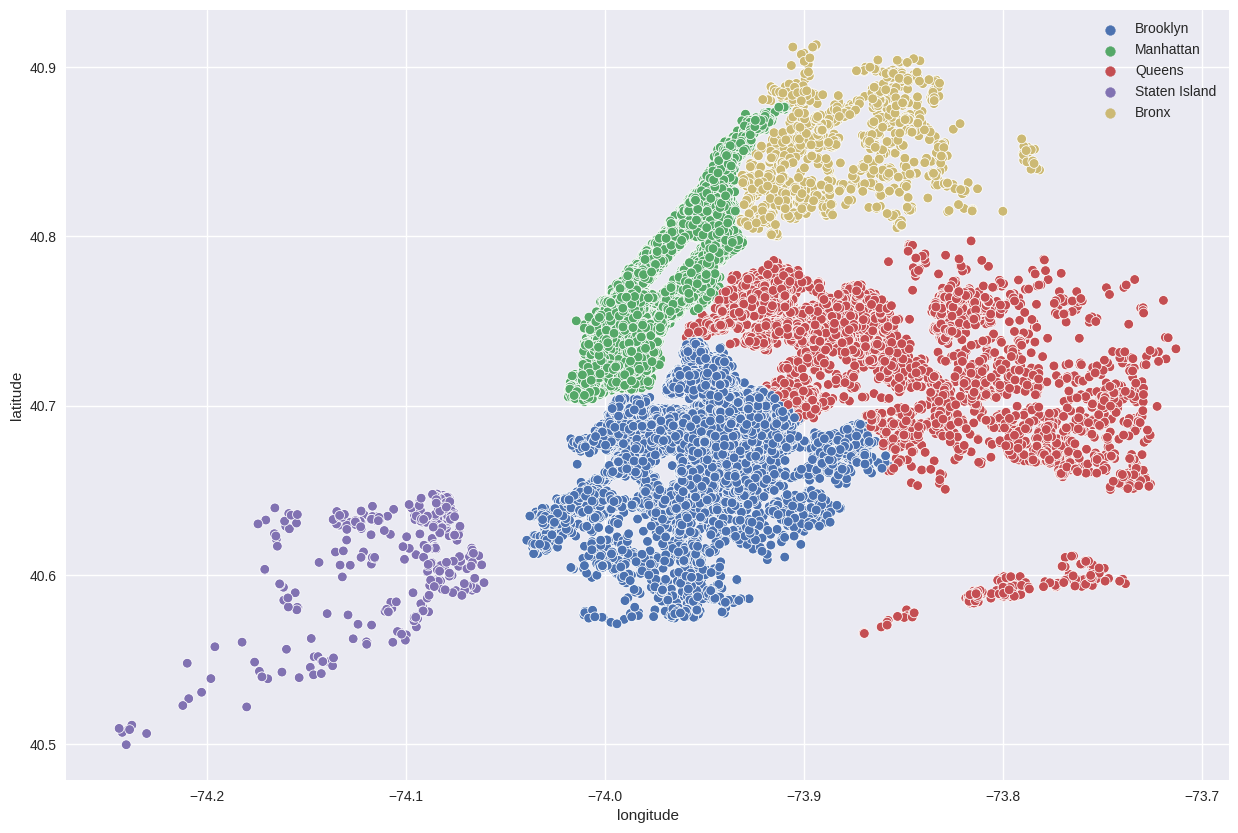

In [ ]:

plt.figure(figsize=(15,10))
fig=sns.scatterplot(
    airbnb.longitude,
    airbnb.latitude,
    hue='neighbourhood_group',
    data=airbnb)
plt.legend(loc=1)

### Visualization and explore the Data


#### Convert the top_host (series) into a DataFrame


In [ ]:
A1= airbnb.loc[airbnb['neighbourhood_group']=='Brooklyn']
price_A1= A1[['price']]
A2= airbnb.loc[airbnb['neighbourhood_group']=='Manhattan']
price_A2= A2[['price']]
A3= airbnb.loc[airbnb['neighbourhood_group']=='Queens']
price_A3=A3[['price']]
A4= airbnb.loc[airbnb['neighbourhood_group']=='Staten Island']
price_A1= A4[['price']]
A5= airbnb.loc[airbnb['neighbourhood_group']=='Bronx']
price_A5= A5[['price']]

In [ ]:
# Put all the prices in one List
price_list= [A1,A2,A3,A4,A5]

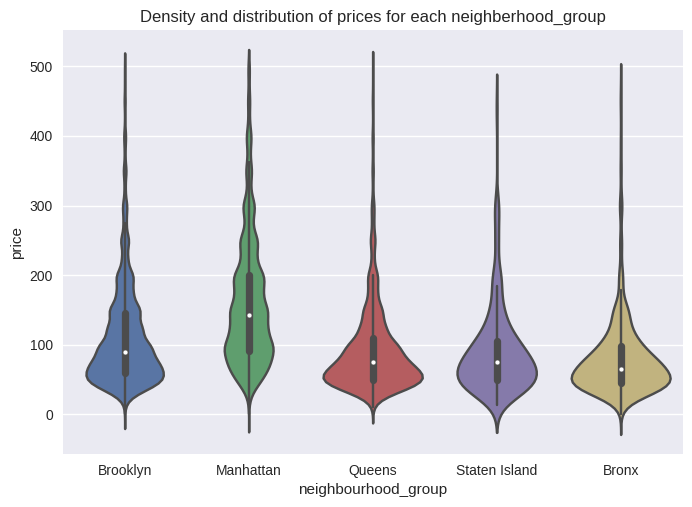

In [ ]:
A6= airbnb[airbnb.price<500]
viz= sns.violinplot(data=A6,x='neighbourhood_group',y='price')
viz.set_title('Density and distribution of prices for each neighberhood_group')
plt.show()

* From the above diagram we can notice 
* Manhattan has the highest range of prices for listing with $150 price as average observation
* Next is Brooklyn
* Queens and Stasen Island appear to have similar Distributions.
* Bronx has the cheapest per night

## Price vs Room Type

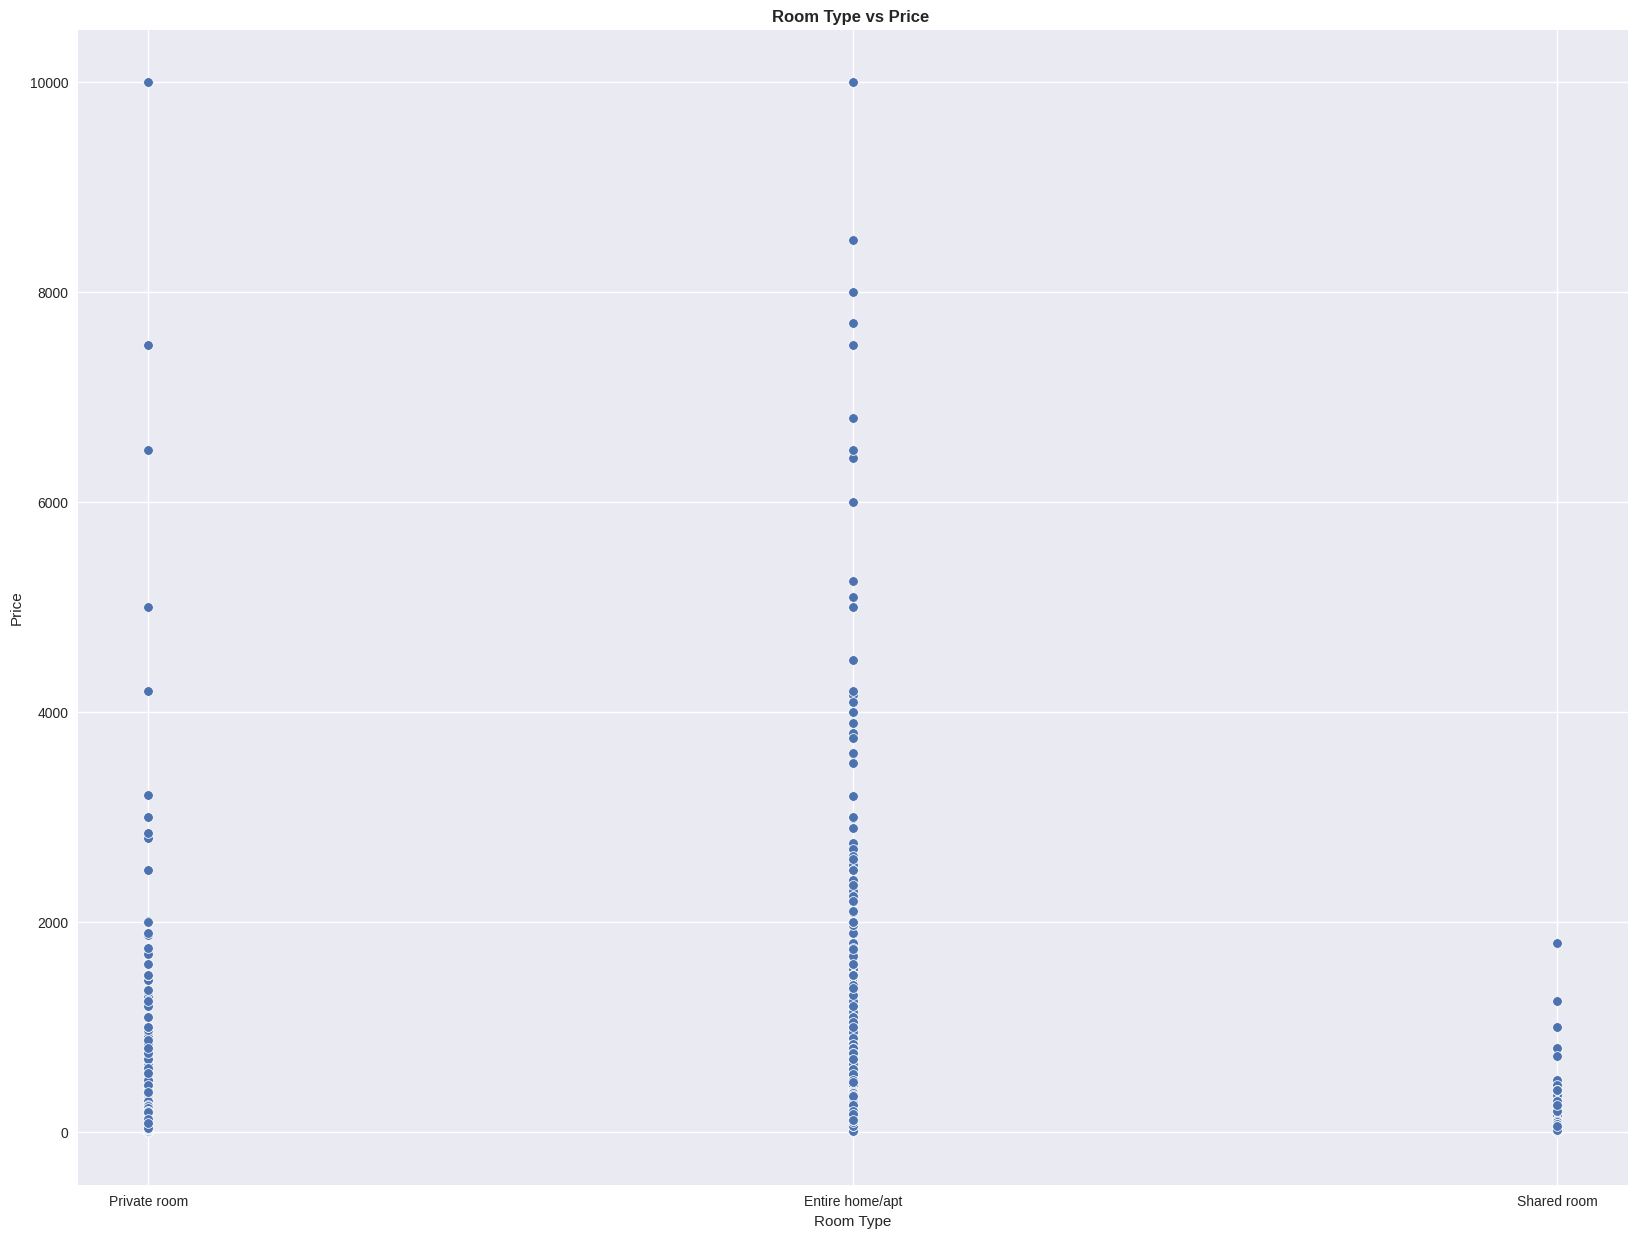

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='room_type',y='price',data=airbnb)
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Room Type vs Price ",weight='bold')
plt.show()

* From the graph we can notice that the price in Private and Entire romm havethe highest prices
* The shared room price is always lower than $200

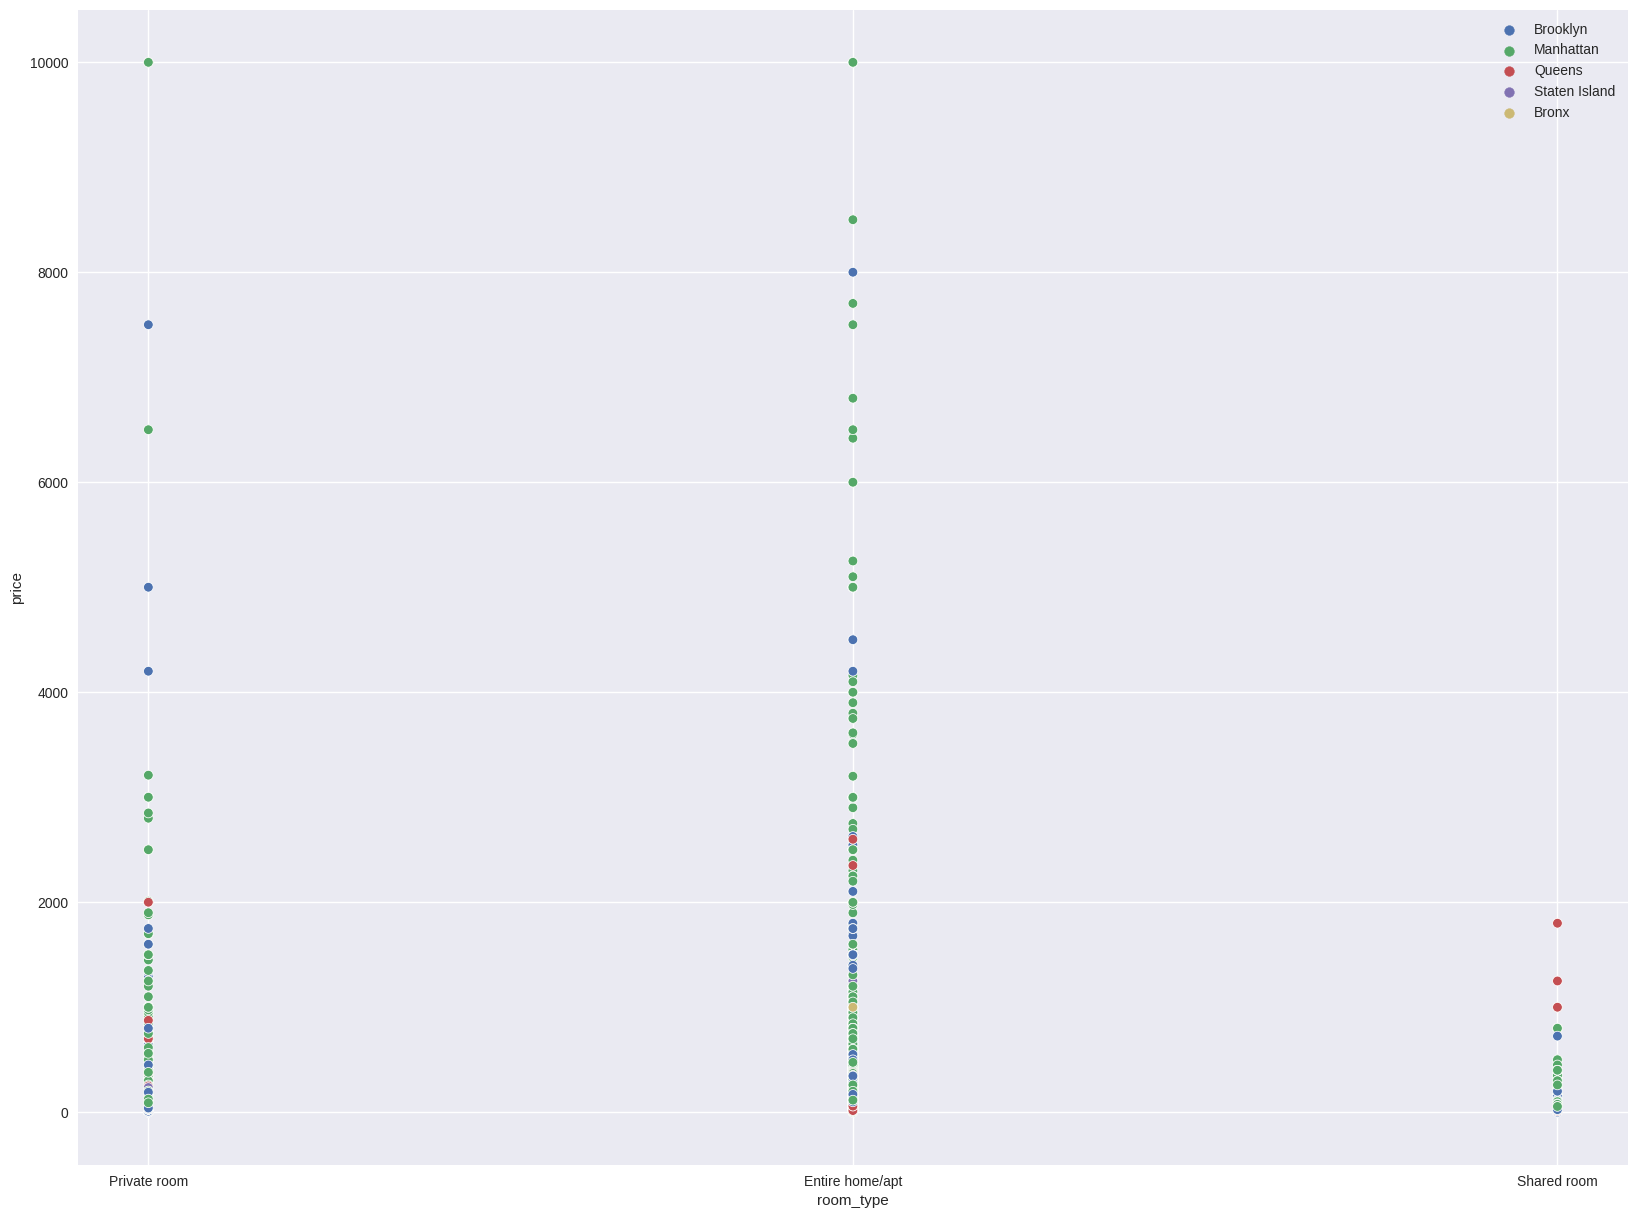

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='room_type',y='price',hue='neighbourhood_group',data=airbnb)
plt.legend(loc=1)
plt.show()

* The highest price of Private Room and Entire Home/Apt is in the same area which is Manhattan.
*  And also brooklyn has very-high prices in Private Room and Entire Home/Apt
*  Shared room's Highest price is in the Queens area

## Deal with the Categorical Variables with the help of cat.codes


### Correlation

<AxesSubplot:>

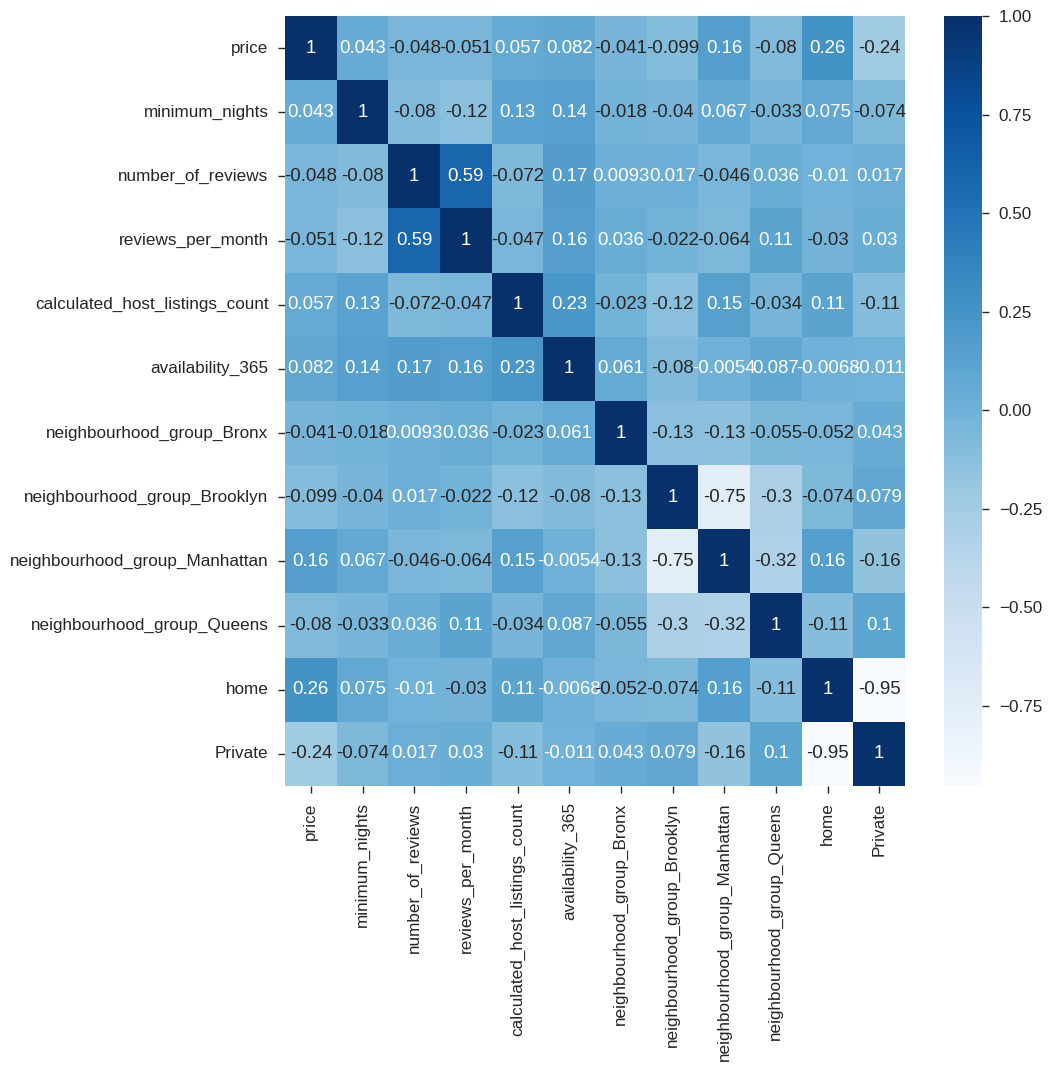

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('paper',font_scale=1.4)

crash_mx= airbnb.corr()
sns.heatmap(crash_mx,annot=True,cmap='Blues')

* There is no string correlation between price and other features.
* This means there is no need to drop any other rows from the dataset

In [ ]:
airbnb.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
airbnb.head(n=3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365


In [ ]:

airbnb.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0
